In [1]:
from LT_container import *

#Option 1: GWGC Catalog
GWGC_dir            = "/mnt/d/GROWTH/LT_algorithm/GWGC_catalog.txt" # local directory of GWGC catalog
GWGC                = pd.read_csv(GWGC_dir, sep='\t') # galaxy list from NED
GWGC                = GWGC.replace(r'^\s+$', np.nan, regex=True)
GWGC.columns       = ['name', 'ra', 'dec', 'TT', 'Bmag', 'e_Bmag', 'a', 'e_a', 'b',
                    'e_b', 'b/a', 'e_b/a', 'PA', 'BMAG', 'e_BMAG', 'dist', 'e_Dist']
for col_name in GWGC.columns[1:]:  # changing the datatypes of the columns form object to float 
     GWGC.loc[:,col_name] = GWGC.loc[:,col_name].astype(float)
GWGC             = GWGC.loc[:,['name','ra','dec','BMAG','dist']]

#===========================================================================================================
# Option 2: CLU NED Catalog; If this catalog is used, change Column names in the rest of the code accordingly  

#CLU_NED_dir         = "/data1/extprajk/catalogs/CLU_NEDonly.fits" # local directory of CLU_NED 
#data                = Table.read(CLU_NED_dir, format = 'fits')
#CLU_NED             = data.to_pandas()

#for col_name in CLU_NED.columns:                                               # some column of the df has uncessary character (b'..') 
#    value = CLU_NED.loc[0,col_name]    
#    value = str(value)
#    if value[0] == 'b':           
#        CLU_NED[col_name] = CLU_NED[col_name].astype(str)                       # first all the values are converted from object to string to split.
#        new               = CLU_NED[col_name].str.split("'", expand = True)     # the string is split
#        CLU_NED[col_name] = new[1] # only the middle column (desired value) is stored and the rest is dropped.
#CLU_NED.columns = [ 'CLUID', 'ID_OTHER', 'name', 'ra', 'dec', 'DM', 'DM_KIN', 'BTC', 'A', 'RATIO_B2A', 'PA', 'TYPE', 'M21', 'RA_NED', 'DEC_NED', 'Z', 'ZERR',
#                    'A_NED', 'B2A_NED', 'PA_NED', 'TYPE_NED', 'SOURCE', 'B_T', 'B_TERR',
#                    'B_R25', 'B_R25ERR', 'RA_SDSS', 'DEC_SDSS', 'PETROMAG_U', 'PETROMAG_G',
#                    'PETROMAG_R', 'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U',
#                    'PETROMAGERR_G', 'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z',
#                    'MODELMAG_U', 'MODELMAG_G', 'MODELMAG_R', 'MODELMAG_I', 'MODELMAG_Z',
#                    'MODELMAGERR_U', 'MODELMAGERR_G', 'MODELMAGERR_R', 'MODELMAGERR_I',
#                    'MODELMAGERR_Z', 'DESIGNATION_WISE', 'W1MPRO', 'W1SIGMPRO', 'W1SNR',
#                    'W2MPRO', 'W2SIGMPRO', 'W2SNR', 'W3MPRO', 'W3SIGMPRO', 'W3SNR',
#                    'W4MPRO', 'W4SIGMPRO', 'W4SNR', 'DESIGNATION_2MASS', 'RA_2MASS',
#                    'DEC_2MASS', 'R_K20FE', 'J_M_K20FE', 'J_MSIG_K20FE', 'J_FLG_K20FE',
#                    'H_M_K20FE', 'H_MSIG_K20FE', 'H_FLG_K20FE', 'K_M_K20FE', 'K_MSIG_K20FE',
#                    'K_FLG_K20FE', 'COORD_SOURCE', 'BTC_SOURCE', 'SIZE_SOURCE', 'DM_SOURCE',
#                    'DM_KIN_OTHER', 'DM_RANGE', 'Z_SOURCE', 'DM_FLAG', 'RA_GALEX',
#                    'DEC_GALEX', 'FUV', 'NUV', 'FUVERR', 'NUVERR', 'Bmag', 'LUM_B',
#                    'dist', 'HAGAL', 'HACAND', 'NEDname']  
#CLU_NED = CLU_NED.loc[:,['name','ra','dec','Bmag','dist']] # only the middle column (desired value) is stored and the rest is dropped.

#=====================================================================================================
#Option 3: GLADE Catalog; If this catalog is used, change Column names in the rest of the code accordingly  

#GLADE_dir           = "/data1/extprajk/catalogs/GLADE_2.3.txt"  # local directory of GLADE Catalog
#GLADE               = pd.read_csv(GLADE_dir, delimiter=' ',header = None)
#GLADE.columns       = ['PGC','name', 'HyperLEDA name','2MASS name','SDSS-DR12 name','flag1','ra','dec','dist','dist_err','z','Bmag', 'Bmag_err','BMAG','Jmag','Jmag_err','Hmag','Hmag_err','Kmag']



In [2]:
#set configurable parameters
start_time          = Time("2019-06-29 21:00") # start time of LT observation 
end_time            = Time("2019-06-30 5:00")  # end time of LT observation
LT                  = Observer.at_site('lapalma')  # information about the site
LT_constraints      = [AltitudeConstraint(20 * u.deg), AtNightConstraint.twilight_nautical(),
                           MoonSeparationConstraint(5 * u.deg), AirmassConstraint(None)]     # constraits for observability
Dist                = 40  # estimated distance of the merger event; units in Mega parsec
Dist_err            = 20  # distance error in Mega parsecs
Event_ID            = 'GW170817'
observation_time    = 2 * 60  #mins
seeing              = 5.0   # units in arcsec
required_SNR        = 50.0  # (used to calculate an estimate for exposure time)
sky_brightness      = 2   #La palma Sky Brightness  
no_of_filters       = 1  # number of filters used for observation
no_of_exposures     = [2,1] # number of exposures in each filter used to caluclate approx. total observation time 
#=========================================================================================================================

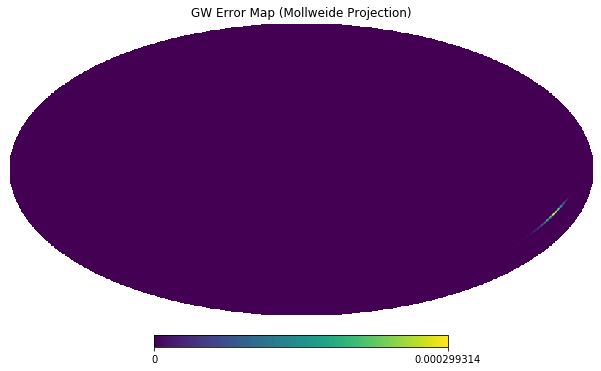

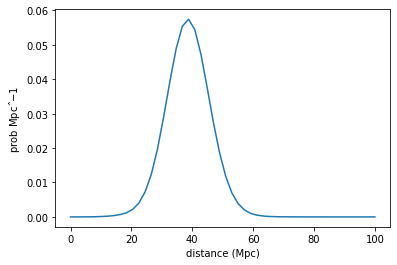

In [3]:
#locally recreating the GW Error Map
bayestar_dir        = "/mnt/d/GROWTH/LT_algorithm/LALInference_v2.fits.gz"  # local directory of the Bayestar map from GRACEDB website     
prob, distmu, distsigma, distnorm = hp.read_map(bayestar_dir, field = [0, 1, 2, 3], verbose = False)
credible_levels       = find_greedy_credible_levels(prob) # obtaining the probability for each pixel if it is in or outside the error region
npix                   = len(prob)
nside                  = hp.npix2nside(npix)
hp.mollview(prob)
plt.savefig("GwErrorMap.png")
plt.title("GW Error Map (Mollweide Projection)")
plt.show()
#==========================================================================================================================
# Locally plotting the GW Event Distance Probability 
r     = np.linspace(0, 100)
dp_dr = [np.sum(prob * rr**2 * distnorm * norm(distmu, distsigma).pdf(rr)) for rr in r]
plt.plot(r, dp_dr)
plt.xlabel('distance (Mpc)')
plt.ylabel('prob Mpc$ˆ{-1}$')
plt.savefig("Distance_probrabilty.png")
plt.show()
#==========================================================================================================================

In [4]:
# Applying various constraints specific to the Liverpool Telescope
host_candidates                            = distance_filter(Dist, Dist_err, GWGC)
probability_levels, credible_list          = credibility(host_candidates, nside,credible_levels)
host_candidates.loc[:,'probabilty_region'] = probability_levels
host_candidates                            = host_candidates[credible_list]
df                                         = host_candidates.loc[:,["name","ra","dec"]] 
targets_astropy                            = Table.from_pandas(df) # converting the dataframe into an astropy table
time_range                              = Time([start_time, end_time])   # time of observation
targets                                 = [FixedTarget(coord = SkyCoord(ra = ra* u.deg, dec=dec* u.deg), name = name) 
                                            for name, ra, dec in targets_astropy]      
LT                                      = Observer.at_site('lapalma')  # information about the site
observable                              = is_observable(LT_constraints,LT,targets, time_range=time_range)  # is observable atleast for a short duration for the given time range
LT_targets                              = host_candidates[observable]
#===========================================================================================================
# Weighting each observable target based on Blue Magnitude, Location and Distance probabilty 
no_BMAG                                 = LT_targets.loc[:,'BMAG']   != 'NaN' # removing galaxies that do not have absolute Blue mag
LT_targets                              = LT_targets[no_BMAG]
BMAG_score                              = scoring(LT_targets.BMAG)   # a list of score values for targets based on Blue Magnitude
LT_targets.loc[:,"BMAG_score"]          = BMAG_score  # adding Bmag_score as a column to the datframe
Prob_region_score                       = scoring(LT_targets.probabilty_region)
LT_targets.loc[:, 'prob_region_score']  = Prob_region_score
final_score_list                        = final_score(LT_targets.loc[:, ["BMAG_score","prob_region_score",'dist_score']])
LT_targets.loc[:, "Final_score"]        = final_score_list
LT_targets                              = LT_targets.sort_values('Final_score', ascending = False)
print ("---------A csv file of list of host candidates is created----------------")
LT_targets.to_csv(r'TargerList.csv')
#================================================================================================================

---------A csv file of list of host candidates is created----------------


In [5]:
#Calculating the optimal exposure time for the Liverpool telescope to maximize the detectability rates 
BNS_mag   = BNS_magnitude(Dist, Dist_err)
print ('Expected BNS merger apparent magnitude: ', BNS_mag)
ExposureTime = exposure_time(BNS_mag, required_SNR, seeing, sky_brightness)
print ('Optimal Exposure time:',ExposureTime,'s')
n   = len(LT_targets)
one_filter_obs, total_obs = total_observation_time(ExposureTime, n, no_of_filters, no_of_exposures)
one_target_obs  = one_filter_obs * no_of_filters
print ('Time to complete observation of one target:', one_target_obs,'m')
print  ('Total approximated time of observation:', total_obs,'m')


Expected BNS merger apparent magnitude:  17.11
Optimal Exposure time: 30 s
Time to complete observation of one target: 3 m
Total approximated time of observation: 267 m


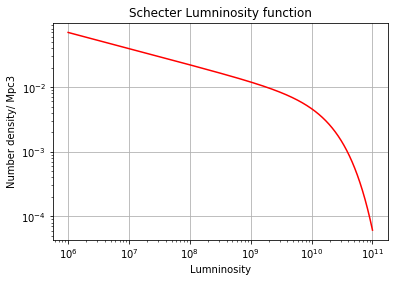

No of galaxies per Mpc^3: 0.10980954226385736
GW Probability volume: 587.4501741688974 Mpc3
Luminous Galaxies in GW Probability Volume: 64


In [6]:
# Finding the total number of galaxies in the GW error volume using schechter luminoisty function
binwidth    = 0.2
H0          = 70   
h_50        = H0 / 50
phi_star    = 0.0002 * (h_50 ** 3)#Mpc-3  
L_star      = 10.38
alpha       = -1.25    
L           = np.linspace(6, 11, 1000000)
schechter   = (1/binwidth)*phi_star * ((10**L / 10**L_star)** (alpha))* np.exp (- 10**L / 10**L_star) * ((10**(L+0.1))+(10**(L-0.1)))/10**L_star
plt.loglog(10**L,schechter,'r')
plt.xlabel('Lumninosity')
plt.title('Schecter Lumninosity function')
plt.grid(True)
plt.ylabel('Number density/ Mpc3')
plt.show()
objects_per_Mpc3 = integrate.simps(schechter, L)
print ('No of galaxies per Mpc^3:', objects_per_Mpc3)
GW_sq_deg       = np.sum(credible_levels <= 0.9) * hp.nside2pixarea(nside, degrees=True)  #compute the 90% credible area by counting the number of pixels inside the 90% credible region and multiplying by the area per pixel
whole_sphere_deg= 41253 
Dist_range      = np.linspace(Dist - Dist_err, Dist + Dist_err, 1000)
area_range      = 4 * np.pi * (GW_sq_deg/whole_sphere_deg) * (Dist_range **2)
GW_vol_Mpc3      = integrate.simps(area_range, Dist_range)
print ('GW Probability volume:', GW_vol_Mpc3,'Mpc3')
no_of_obj       = int(GW_vol_Mpc3*objects_per_Mpc3)
print ('Luminous Galaxies in GW Probability Volume:', no_of_obj)
#========================================================================================================================

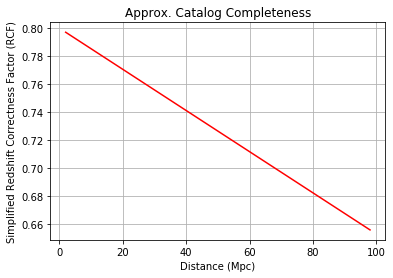

Approx. Catalog Completeness: 74.42999999999999 %
Completeness of the observation:  74.43 %


In [7]:
# Finding the catalog completeness for this event using the approximated RCF function
prob         = [(i) for i in dp_dr if i>1e-10]
r_s          = r[dp_dr.index(prob[0])]
r_end        = r[dp_dr.index(prob[len(prob)-1])]
Dist         = np.arange(r_s, r_end, (r_end-r_s) / len(prob))  # Distance distribution
RCF_d        = 0.8 - 0.00147 * Dist
RCF_d        = [(i) for i in RCF_d if i>1e-4]
plt.plot(Dist[0:len(RCF_d)], RCF_d,'r')
plt.title('Approx. Catalog Completeness') 
plt.xlabel('Distance (Mpc)')
plt.grid()
plt.ylabel('Simplified Redshift Correctness Factor (RCF)')                # redshift correctness factor
plt.show()
weighted_RCF_value  = weighted_RCF(RCF_d, prob)  # completeness of the catalog
print('Approx. Catalog Completeness:', weighted_RCF_value*100,'%')
Bmag                = LT_targets[0:100]['BMAG'].sum()
total_Bmag          = LT_targets['BMAG'].sum()            
probability         = Bmag / total_Bmag                   #completeness of the observation
completeness        = round(weighted_RCF_value * probability * 100,2)
print ('Completeness of the observation: ',completeness,'%')